<a href="https://colab.research.google.com/github/riqx-code/CARscan/blob/main/Task_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##***Info about techniques used is above code as comments and Markdown***


## Package Importing

Tried to use kaggle API, but faced some issues so  I used **Mount Drive** and imported the downloaded data.

Now lets import major libraries the we will use in the classifier building

In [2]:
# To build classifier
import tensorflow as tf

# ImageDataGenerator module used for image preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# images are stored in arrays form , so to operate on then we need a array module
import numpy as np

# to get image parameters I use opencv
import cv2 as cv

# to import subject image in google colab I need this module
from google.colab import files

# to show evaluvation results
import matplotlib.pyplot as plt

## DATASET IMPORTING &  PREPROCESSING

Now lets create **Train & Test data generator** using **ImageDataGenarator**

we create train_data with ***normalisation*** of pixel values to float 0-1.0 by rescalling by factor ***1.0/255***

In [3]:
# we create train_data with normalisation of pixel values to float 0-1.0 by rescalling by factor 1.0/255
train_data = ImageDataGenerator(rescale = 1.0/255)
test_data = ImageDataGenerator(rescale = 1.0/255)

In [4]:
# path of train and test(validate) folder in my colab environment 
path_train = '/content/drive/MyDrive/bcdamage/data1a/training'
path_test = '/content/drive/MyDrive/bcdamage/data1a/validation'

Batch_size as we have arround ***1800(train) + 500(test)*** images lets keep it as ***50***

***target_size*** is dimentions of the input image , ***resizing** the images to keep all input sizes uniform.It can be any ***arbitary value***.So I picked ***(200,200)***

We have two output classes so ***class_mode*** is ***'binary'***

In [5]:
batch_sizes = 50

#target_size is tuple of output images from preprocessors , it's arbitary 
target_sizes = (200,200)

#class_mode is number of classes , here we are classifing into damaged or not so it is binary
class_modes = 'binary'

# Train & Test data generation

Training data generator

In [6]:
train_gen = train_data.flow_from_directory('/content/drive/MyDrive/bcdamage/data1a/training',batch_size=50,class_mode='binary',target_size=(200, 200))

Found 1840 images belonging to 2 classes.


Testing data generator

In [7]:
test_gen =  test_data.flow_from_directory('/content/drive/MyDrive/bcdamage/data1a/validation',batch_size=50,class_mode='binary',target_size=(200,200))

Found 460 images belonging to 2 classes.


# MODEL CREATION



1.   CONVOLUTION LAYER : it's the filter that extracts the feature from a image
2.   Max pooling : This process helps us in considering only pixels that sustained(enought activation value) after convolution.

So we use **CONVOLUTION LAYER** and **Max Pooling layer** as pair.

We are going to use 3 pairs of CONV2D and Max_pooling layers in hidden layers.Then a **flatenning layer** then we try to converg all the outputs using two **dense layers**.



***Layer Parameters***


1.   Convolution layer 1 :
          Kernal size = 3 x 3 
          no.of filters = 16
          relu activation
          input = image of shape 200,200,3 : RGB
      Pooling Layer 1:
          size = 2,2

2.   Convolution layer 2 :
          Kernal size = 3 x 3 
          no.of filters = 32
          relu activation
          input = size of Max_pooling 1
      Pooling Layer 2:
          size = 2,2

3.   Convolution layer 3 :
          Kernal size = 3 x 3 
          no.of filters = 64
          relu activation
          input = size of Max_pooling 2
      Pooling Layer 3:
          size = 2,2

4. Flatten layer :

          input size = 23 x 23 x 64

          output size = 33856

5. Dense Layer 1 :

          converges 33856 tensors output to 512 tensor outputs

6. Dense Layer 2 :

          converges 512 tensors output to 1 class output

                  




In [9]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

# Model Compilation

Compiling a model is adding a few process of operation how model will train itself. Arguments for compiler

1. optimizer : it helps in backtracking phase to change layer weights and biases

    we can use the following optimizers :

      ***SGD − Stochastic gradient descent optimizer***

      ***RMSprop − RMSProp optimizer***

      ***Adam − Adam optimizer***

      ***Adamax − Adamax optimizer from Adam***

      ***Nadam − Nesterov Adam optimizer***

      I prefered Adam optimizer as it's **faster**  , **good noise reception** and **optimized** compared to other.

2. Loss : It helps in calculation of error during backtracking 

      we have different types of loss function but for binary classification we generally prefer **Binary cross entropy**.

3. Metric : 
    It's a comparision function same as Loss , but we don't use it for training but we use this for evaluvation purposes.
      I'm using **'accuracy'** as the metric.


In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])

# Preparing the Model

We pass the data through the CNN , Number of times of forward and backward propagation = **epoch**.

steps_per_epoch : The quotient of total sample size / batch size 

here  1840/50 = 36

for testing = 460/50 = 9

In [12]:
history = model.fit(
            train_gen, # pass in the training generator
            steps_per_epoch=36,
            epochs=15,
            validation_data=test_gen, # pass in the validation generator
            validation_steps=9,
            verbose=2
            )

Epoch 1/15
36/36 - 459s - loss: 0.8589 - accuracy: 0.5966 - val_loss: 0.6054 - val_accuracy: 0.6733 - 459s/epoch - 13s/step
Epoch 2/15
36/36 - 92s - loss: 0.5296 - accuracy: 0.7520 - val_loss: 0.5187 - val_accuracy: 0.7333 - 92s/epoch - 3s/step
Epoch 3/15
36/36 - 86s - loss: 0.4192 - accuracy: 0.8257 - val_loss: 0.5313 - val_accuracy: 0.7356 - 86s/epoch - 2s/step
Epoch 4/15
36/36 - 87s - loss: 0.3513 - accuracy: 0.8536 - val_loss: 0.5120 - val_accuracy: 0.7489 - 87s/epoch - 2s/step
Epoch 5/15
36/36 - 87s - loss: 0.2589 - accuracy: 0.8961 - val_loss: 0.4521 - val_accuracy: 0.7889 - 87s/epoch - 2s/step
Epoch 6/15
36/36 - 84s - loss: 0.1651 - accuracy: 0.9447 - val_loss: 0.4717 - val_accuracy: 0.7911 - 84s/epoch - 2s/step
Epoch 7/15
36/36 - 87s - loss: 0.0977 - accuracy: 0.9682 - val_loss: 0.5518 - val_accuracy: 0.7933 - 87s/epoch - 2s/step
Epoch 8/15
36/36 - 92s - loss: 0.0628 - accuracy: 0.9827 - val_loss: 0.6029 - val_accuracy: 0.8000 - 92s/epoch - 3s/step
Epoch 9/15
36/36 - 84s - loss

# Evaluvation

I used ***history*** function & matplotlib  to visuvalize the training parameters.



1.   Training Accuracy : After 15 epoches , model got to 100% accuracy.So we need not improve or diversify the training data.
2.   Validation Accuracy : Here Validation accuracy is lower than Training accuracy, but it's 80% which is a good model.If I would get




Text(0.5, 1.0, 'Training loss &  Testing loss')

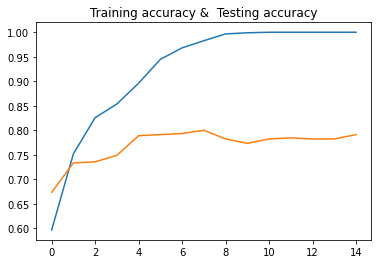

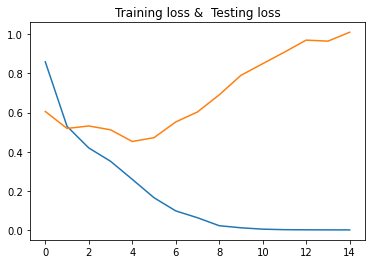

In [66]:
acu = history.history['accuracy']
val_acu = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acu)) 

 
plt.plot(epochs, acu)
plt.plot(epochs, val_acu)
plt.title('Training accuracy &  Testing accuracy')
plt.figure()

# plot loss 
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training loss &  Testing loss')

# OVERFITTING PROBLEM 

As it's a ***Overfitting*** problem lets first try ***early stopping*** with monitoring  of val_accuracy

## EARLY_STOPING_MODEL

Now lets try early stopping with monitoring on ***VALUVATION ACCURACY*** and waiting for ***3 epoches*** as ***patience***

In [15]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

Callbacking - ***early stoping*** model named as model_es **es = earlystopping**

In [16]:
model_es = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [18]:
model_es.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [19]:
history_es = model_es.fit(
            train_gen, # pass in the training generator
            steps_per_epoch=36,
            epochs=15,
            validation_data=test_gen, # pass in the validation generator
            validation_steps=9,
            callbacks=[callback],
            verbose=2
            )

Epoch 1/15
36/36 - 88s - loss: 0.7812 - accuracy: 0.5849 - val_loss: 0.6028 - val_accuracy: 0.6911 - 88s/epoch - 2s/step
Epoch 2/15
36/36 - 83s - loss: 0.5278 - accuracy: 0.7486 - val_loss: 0.4808 - val_accuracy: 0.7733 - 83s/epoch - 2s/step
Epoch 3/15
36/36 - 83s - loss: 0.4012 - accuracy: 0.8201 - val_loss: 0.4872 - val_accuracy: 0.7644 - 83s/epoch - 2s/step
Epoch 4/15
36/36 - 85s - loss: 0.3355 - accuracy: 0.8698 - val_loss: 0.4609 - val_accuracy: 0.7867 - 85s/epoch - 2s/step
Epoch 5/15
36/36 - 83s - loss: 0.2600 - accuracy: 0.9006 - val_loss: 0.4995 - val_accuracy: 0.7644 - 83s/epoch - 2s/step
Epoch 6/15
36/36 - 83s - loss: 0.1748 - accuracy: 0.9335 - val_loss: 0.6191 - val_accuracy: 0.7356 - 83s/epoch - 2s/step
Epoch 7/15
36/36 - 83s - loss: 0.1326 - accuracy: 0.9531 - val_loss: 0.5271 - val_accuracy: 0.7844 - 83s/epoch - 2s/step


Text(0.5, 1.0, 'Loss in training and testing')

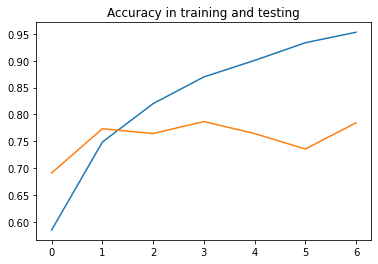

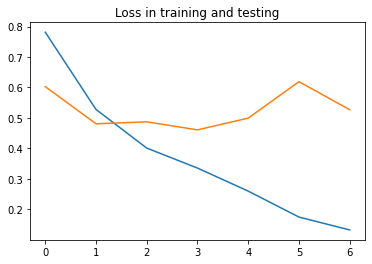

In [37]:
# get the metrics from history

acc = history_es.history['accuracy']
val_acc = history_es.history['val_accuracy']
loss = history_es.history['loss']
val_loss = history_es.history['val_loss']

epochs = range(len(acc)) 

# plot accuracy 
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Accuracy in training and testing')
plt.figure()

# plot loss 
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss in training and testing')

***FEATURE MAPPING***

1/1 [==============================] - 0s 223ms/step


<ipython-input-68-52f2cfaf2def>:39: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()


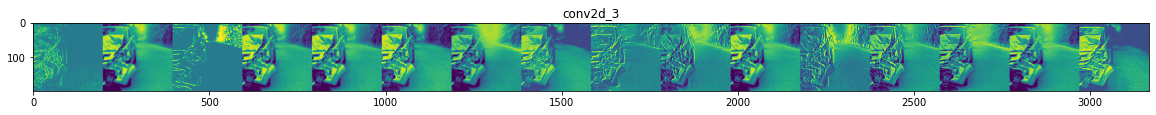

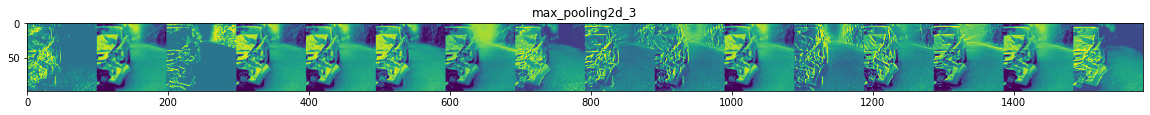

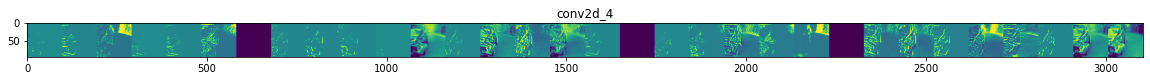

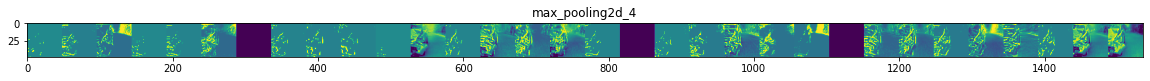

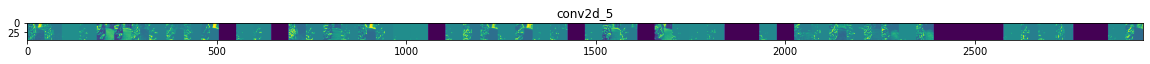

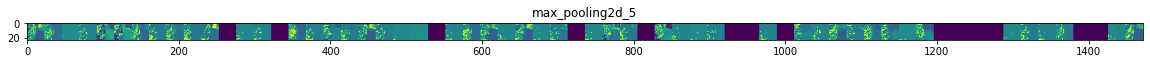

In [68]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# we define a new custom Keras model that receives an input image
# and returns the representations of the layers of the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=successive_outputs)


img = load_img('/content/carched.jpg', target_size=(200, 200))  # this is a raw image in PIL format
x   = img_to_array(img)                           # np array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # np array with shape  (1, 150, 150, 3)

# rescale pixel values 1/255
x /= 255.0

# by making calling the predict method we obtain
# the intermediate representations of this image from the previous model
successive_feature_maps = visualization_model.predict(x)

# let's map the layers of this model with their name
layer_names = [layer.name for layer in model_es.layers]

# plot everything
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4: # if it is a conv or pooling layer
    n_features = feature_map.shape[-1]  # n features
    size       = feature_map.shape[ 1]  # shape
    
    # create a grid to display the data
    display_grid = np.zeros((size, size * n_features))
    
    # some post-processing
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x

    # show the chart
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 


No Improvement in ***valuvation_accuracy*** , by looking at feature maps lets try **Data Augumentation**

Now lets do ***DATA AUGUMENTATION***

In [22]:
data_augumentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal',input_shape=(200,200,3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1)
])

In [32]:
model_da = tf.keras.models.Sequential([
    data_augumentation, # data augumentation added
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),  # random layer droping 
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [33]:
model_da.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [34]:
history_da = model_da.fit(
            train_gen, # pass in the training generator
            steps_per_epoch=36,
            epochs=15,
            validation_data=test_gen, # pass in the validation generator
            validation_steps=9,
            verbose=2
            )

Epoch 1/15
36/36 - 95s - loss: 0.9022 - accuracy: 0.5589 - val_loss: 0.6545 - val_accuracy: 0.6378 - 95s/epoch - 3s/step
Epoch 2/15
36/36 - 96s - loss: 0.6303 - accuracy: 0.6536 - val_loss: 0.6820 - val_accuracy: 0.6044 - 96s/epoch - 3s/step
Epoch 3/15
36/36 - 92s - loss: 0.6028 - accuracy: 0.6922 - val_loss: 0.5695 - val_accuracy: 0.6889 - 92s/epoch - 3s/step
Epoch 4/15
36/36 - 102s - loss: 0.5633 - accuracy: 0.7156 - val_loss: 0.6326 - val_accuracy: 0.6556 - 102s/epoch - 3s/step
Epoch 5/15
36/36 - 96s - loss: 0.5393 - accuracy: 0.7341 - val_loss: 0.5629 - val_accuracy: 0.7156 - 96s/epoch - 3s/step
Epoch 6/15
36/36 - 98s - loss: 0.5298 - accuracy: 0.7464 - val_loss: 0.7340 - val_accuracy: 0.6444 - 98s/epoch - 3s/step
Epoch 7/15
36/36 - 93s - loss: 0.5070 - accuracy: 0.7626 - val_loss: 0.4701 - val_accuracy: 0.7733 - 93s/epoch - 3s/step
Epoch 8/15
36/36 - 94s - loss: 0.4849 - accuracy: 0.7721 - val_loss: 0.7438 - val_accuracy: 0.6822 - 94s/epoch - 3s/step
Epoch 9/15
36/36 - 92s - loss:

Text(0.5, 1.0, 'Loss in training and testing')

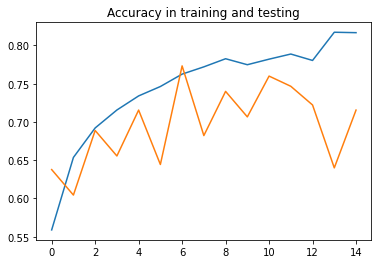

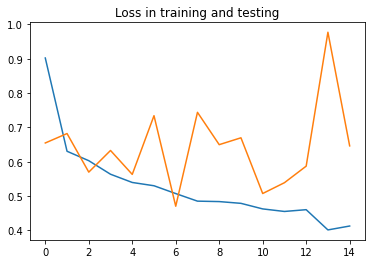

In [38]:
# get the metrics from history

acc = history_da.history['accuracy']
val_acc = history_da.history['val_accuracy']
loss = history_da.history['loss']
val_loss = history_da.history['val_loss']

epochs = range(len(acc)) 

# plot accuracy 
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Accuracy in training and testing')
plt.figure()

# plot loss 
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss in training and testing')

1/1 [==============================] - 0s 137ms/step


<ipython-input-69-219bde9f3aa6>:39: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()


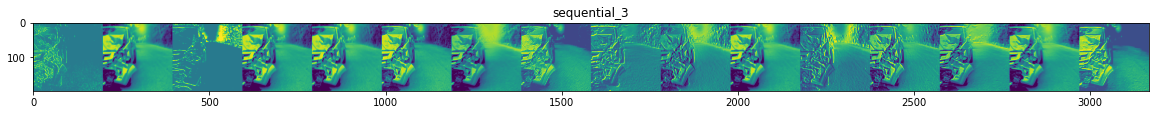

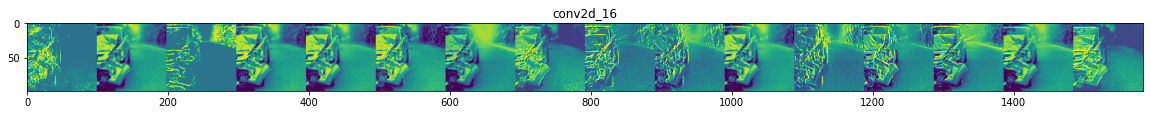

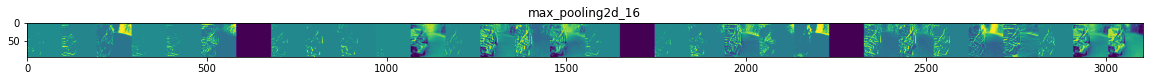

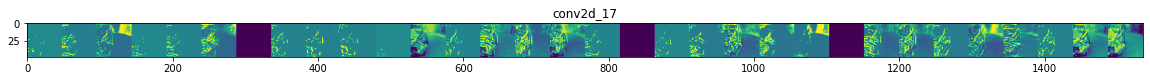

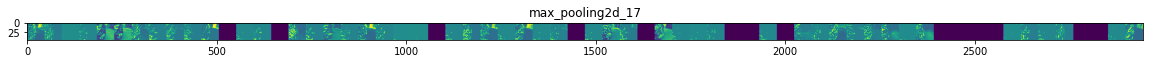

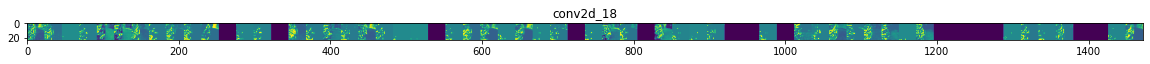

In [69]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# we define a new custom Keras model that receives an input image
# and returns the representations of the layers of the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=successive_outputs)


img = load_img('/content/carched.jpg', target_size=(200, 200))  # this is a raw image in PIL format
x   = img_to_array(img)                           # np array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # np array with shape  (1, 150, 150, 3)

# rescale pixel values 1/255
x /= 255.0

# by making calling the predict method we obtain
# the intermediate representations of this image from the previous model
successive_feature_maps = visualization_model.predict(x)

# let's map the layers of this model with their name
layer_names = [layer.name for layer in model_da.layers]

# plot everything
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4: # if it is a conv or pooling layer
    n_features = feature_map.shape[-1]  # n features
    size       = feature_map.shape[ 1]  # shape
    
    # create a grid to display the data
    display_grid = np.zeros((size, size * n_features))
    
    # some post-processing
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x

    # show the chart
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

Even after ***DATA AUGUMENTATION*** validation_accuracy is still **71 %**
and train_accuracy is ***81 %***

So Now lets simplify the model, remove one pair of conv2D and Maxpooling layers with out ***augumentation***

So , lets remove a conv2D layer and Maxpooling layer 

In [29]:
model_simp = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Dropout(0.2),  # random layer droping 
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [31]:
model_simp.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [35]:
history_simp = model_simp.fit(
            train_gen, # pass in the training generator
            steps_per_epoch=36,
            epochs=15,
            validation_data=test_gen, # pass in the validation generator
            validation_steps=9,
            verbose=2
            )

Epoch 1/15
36/36 - 86s - loss: 3.0319 - accuracy: 0.5229 - val_loss: 0.6812 - val_accuracy: 0.5133 - 86s/epoch - 2s/step
Epoch 2/15
36/36 - 79s - loss: 0.6297 - accuracy: 0.6257 - val_loss: 1.0192 - val_accuracy: 0.5533 - 79s/epoch - 2s/step
Epoch 3/15
36/36 - 90s - loss: 0.5194 - accuracy: 0.7603 - val_loss: 0.4986 - val_accuracy: 0.7689 - 90s/epoch - 3s/step
Epoch 4/15
36/36 - 80s - loss: 0.3323 - accuracy: 0.8659 - val_loss: 0.4631 - val_accuracy: 0.7978 - 80s/epoch - 2s/step
Epoch 5/15
36/36 - 81s - loss: 0.1859 - accuracy: 0.9363 - val_loss: 0.6738 - val_accuracy: 0.7044 - 81s/epoch - 2s/step
Epoch 6/15
36/36 - 82s - loss: 0.1087 - accuracy: 0.9728 - val_loss: 0.5644 - val_accuracy: 0.7644 - 82s/epoch - 2s/step
Epoch 7/15
36/36 - 79s - loss: 0.0422 - accuracy: 0.9939 - val_loss: 0.6838 - val_accuracy: 0.7578 - 79s/epoch - 2s/step
Epoch 8/15
36/36 - 82s - loss: 0.0209 - accuracy: 0.9966 - val_loss: 0.6850 - val_accuracy: 0.7756 - 82s/epoch - 2s/step
Epoch 9/15
36/36 - 79s - loss: 0

Text(0.5, 1.0, 'Loss in training and testing')

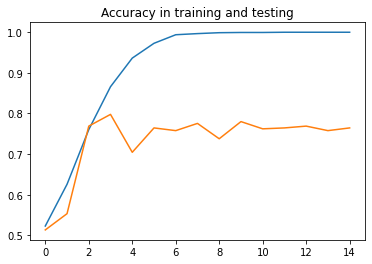

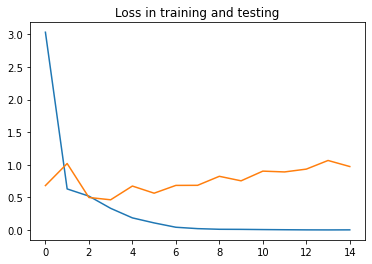

In [39]:
# get the metrics from history

acc = history_simp.history['accuracy']
val_acc = history_simp.history['val_accuracy']
loss = history_simp.history['loss']
val_loss = history_simp.history['val_loss']

epochs = range(len(acc)) 

# plot accuracy 
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Accuracy in training and testing')
plt.figure()

# plot loss 
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss in training and testing')

1/1 [==============================] - 0s 115ms/step


<ipython-input-70-ba4b07996d69>:39: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()


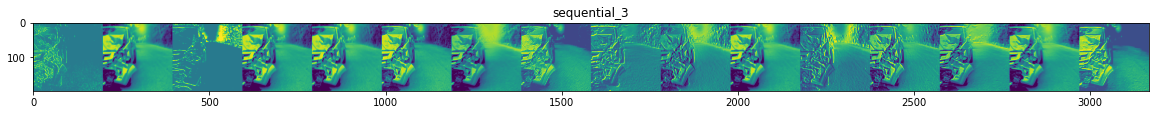

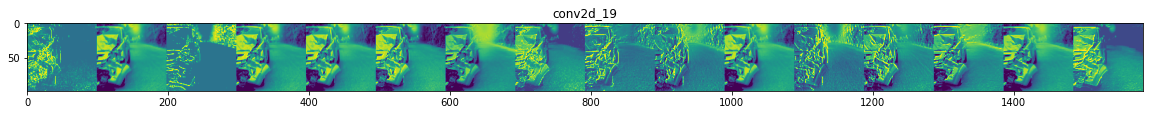

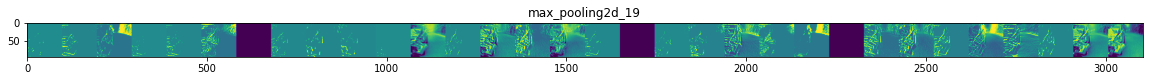

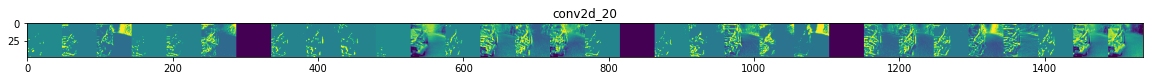

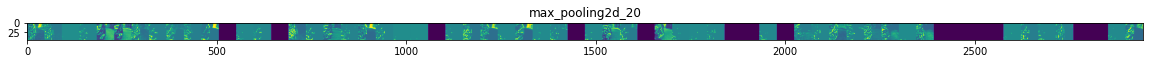

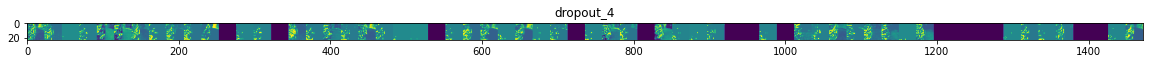

In [70]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# we define a new custom Keras model that receives an input image
# and returns the representations of the layers of the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=successive_outputs)


img = load_img('/content/carched.jpg', target_size=(200, 200))  # this is a raw image in PIL format
x   = img_to_array(img)                           # np array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # np array with shape  (1, 150, 150, 3)

# rescale pixel values 1/255
x /= 255.0

# by making calling the predict method we obtain
# the intermediate representations of this image from the previous model
successive_feature_maps = visualization_model.predict(x)

# let's map the layers of this model with their name
layer_names = [layer.name for layer in model_simp.layers]

# plot everything
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4: # if it is a conv or pooling layer
    n_features = feature_map.shape[-1]  # n features
    size       = feature_map.shape[ 1]  # shape
    
    # create a grid to display the data
    display_grid = np.zeros((size, size * n_features))
    
    # some post-processing
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x

    # show the chart
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

As we can see in results **data augumentation** helped to keep shape of validation_accuracy. And ***simplified model*** helped with proper shape so lets try **data augumented simplified model**

In [42]:
model_dasimp = tf.keras.models.Sequential([
    data_augumentation, # data augumentation
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Dropout(0.2),  # random layer droping 
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [44]:
model_dasimp.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [45]:
history_dasimp = model_dasimp.fit(
            train_gen, # pass in the training generator
            steps_per_epoch=36,
            epochs=15,
            validation_data=test_gen, # pass in the validation generator
            validation_steps=9,
            verbose=2
            )

Epoch 1/15
36/36 - 99s - loss: 1.6000 - accuracy: 0.4983 - val_loss: 0.6739 - val_accuracy: 0.5911 - 99s/epoch - 3s/step
Epoch 2/15
36/36 - 88s - loss: 0.6516 - accuracy: 0.6162 - val_loss: 0.6329 - val_accuracy: 0.6244 - 88s/epoch - 2s/step
Epoch 3/15
36/36 - 88s - loss: 0.6137 - accuracy: 0.6581 - val_loss: 0.5975 - val_accuracy: 0.6844 - 88s/epoch - 2s/step
Epoch 4/15
36/36 - 88s - loss: 0.5953 - accuracy: 0.6765 - val_loss: 0.6058 - val_accuracy: 0.6556 - 88s/epoch - 2s/step
Epoch 5/15
36/36 - 90s - loss: 0.5757 - accuracy: 0.6911 - val_loss: 0.5868 - val_accuracy: 0.7022 - 90s/epoch - 3s/step
Epoch 6/15
36/36 - 88s - loss: 0.5443 - accuracy: 0.7268 - val_loss: 0.6135 - val_accuracy: 0.6733 - 88s/epoch - 2s/step
Epoch 7/15
36/36 - 88s - loss: 0.5424 - accuracy: 0.7190 - val_loss: 0.6539 - val_accuracy: 0.6556 - 88s/epoch - 2s/step
Epoch 8/15
36/36 - 92s - loss: 0.5275 - accuracy: 0.7374 - val_loss: 0.5380 - val_accuracy: 0.7400 - 92s/epoch - 3s/step
Epoch 9/15
36/36 - 88s - loss: 0

Text(0.5, 1.0, 'Loss in training and testing')

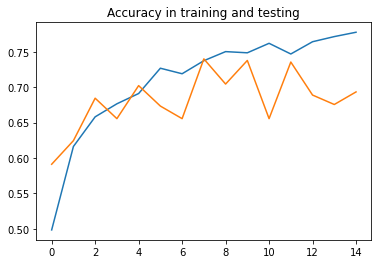

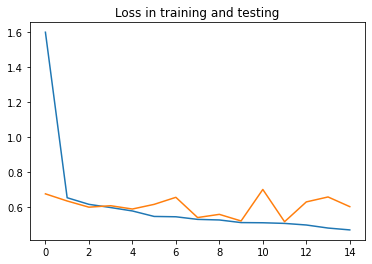

In [46]:
# get the metrics from history

acc = history_dasimp.history['accuracy']
val_acc = history_dasimp.history['val_accuracy']
loss = history_dasimp.history['loss']
val_loss = history_dasimp.history['val_loss']

epochs = range(len(acc)) 

# plot accuracy 
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Accuracy in training and testing')
plt.figure()

# plot loss 
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss in training and testing')

1/1 [==============================] - 0s 197ms/step


<ipython-input-71-a0429e2fe79c>:39: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()


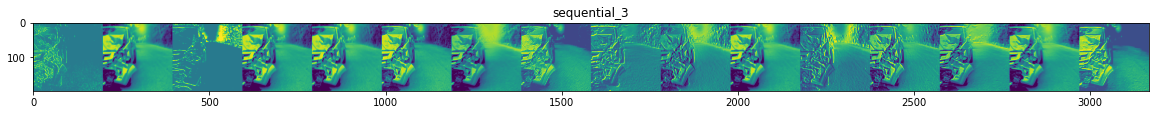

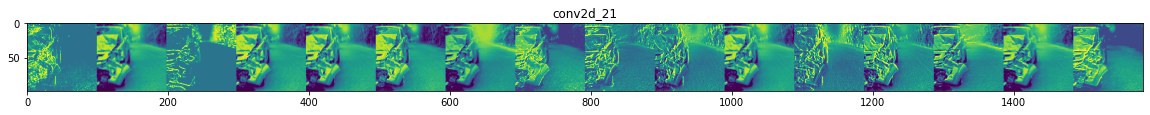

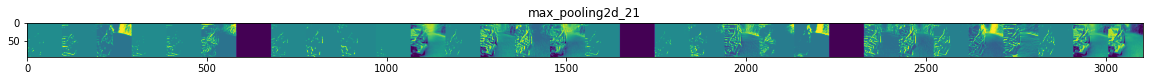

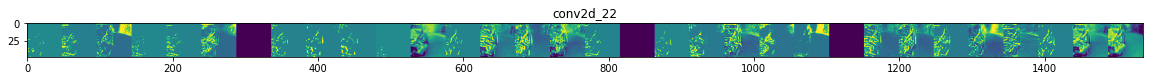

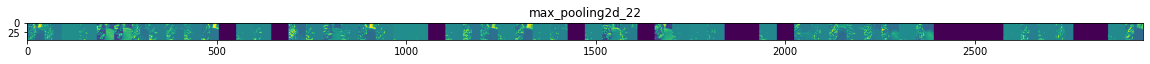

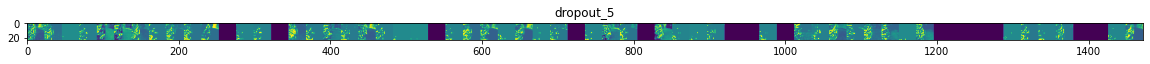

In [71]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# we define a new custom Keras model that receives an input image
# and returns the representations of the layers of the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=successive_outputs)


img = load_img('/content/carched.jpg', target_size=(200, 200))  # this is a raw image in PIL format
x   = img_to_array(img)                           # np array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # np array with shape  (1, 150, 150, 3)

# rescale pixel values 1/255
x /= 255.0

# by making calling the predict method we obtain
# the intermediate representations of this image from the previous model
successive_feature_maps = visualization_model.predict(x)

# let's map the layers of this model with their name
layer_names = [layer.name for layer in model_dasimp.layers]

# plot everything
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4: # if it is a conv or pooling layer
    n_features = feature_map.shape[-1]  # n features
    size       = feature_map.shape[ 1]  # shape
    
    # create a grid to display the data
    display_grid = np.zeros((size, size * n_features))
    
    # some post-processing
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x

    # show the chart
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

Now there is ***no Overfitting*** , so lets optimize it by chnaging ***optimizer***

Optimizer ***RMSprop*** solves our problem by keeping **training_accuracy** & **Validation_accuracy** as close as possible for a dataset.

***RMSprop*** restricts vertical osscilations.

In [56]:
model_opt = tf.keras.models.Sequential([
    data_augumentation, # data augumentation
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Dropout(0.2),  # random layer droping 
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [57]:
model_opt.compile(optimizer='RMSprop',loss='binary_crossentropy',metrics = ['accuracy'])

In [58]:
history_opt = model_opt.fit(
            train_gen, # pass in the training generator
            steps_per_epoch=36,
            epochs=15,
            validation_data=test_gen, # pass in the validation generator
            validation_steps=9,
            verbose=2
            )

Epoch 1/15
36/36 - 99s - loss: 3.5657 - accuracy: 0.5274 - val_loss: 0.6157 - val_accuracy: 0.6689 - 99s/epoch - 3s/step
Epoch 2/15
36/36 - 93s - loss: 0.6587 - accuracy: 0.6257 - val_loss: 0.6072 - val_accuracy: 0.6844 - 93s/epoch - 3s/step
Epoch 3/15
36/36 - 102s - loss: 0.6453 - accuracy: 0.6715 - val_loss: 0.8338 - val_accuracy: 0.6111 - 102s/epoch - 3s/step
Epoch 4/15
36/36 - 96s - loss: 0.6133 - accuracy: 0.6804 - val_loss: 0.5692 - val_accuracy: 0.7000 - 96s/epoch - 3s/step
Epoch 5/15
36/36 - 94s - loss: 0.6002 - accuracy: 0.6983 - val_loss: 0.5953 - val_accuracy: 0.6933 - 94s/epoch - 3s/step
Epoch 6/15
36/36 - 98s - loss: 0.6132 - accuracy: 0.6972 - val_loss: 0.5298 - val_accuracy: 0.7467 - 98s/epoch - 3s/step
Epoch 7/15
36/36 - 94s - loss: 0.5817 - accuracy: 0.7117 - val_loss: 0.5636 - val_accuracy: 0.7333 - 94s/epoch - 3s/step
Epoch 8/15
36/36 - 95s - loss: 0.5813 - accuracy: 0.7167 - val_loss: 0.5436 - val_accuracy: 0.7444 - 95s/epoch - 3s/step
Epoch 9/15
36/36 - 103s - loss

Text(0.5, 1.0, 'Loss in training and testing')

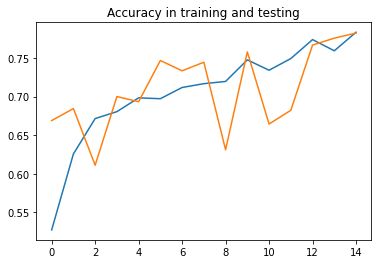

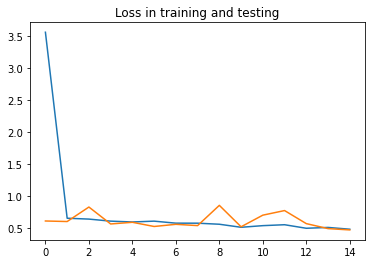

In [59]:
# get the metrics from history

acc = history_opt.history['accuracy']
val_acc = history_opt.history['val_accuracy']
loss = history_opt.history['loss']
val_loss = history_opt.history['val_loss']

epochs = range(len(acc)) 

# plot accuracy 
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Accuracy in training and testing')
plt.figure()

# plot loss 
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss in training and testing')

1/1 [==============================] - 0s 103ms/step


<ipython-input-72-e7368be32934>:39: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()


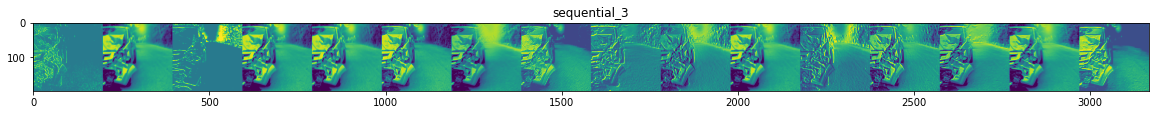

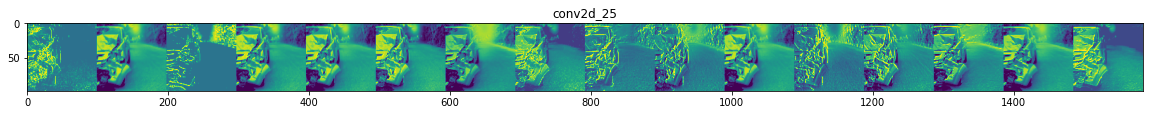

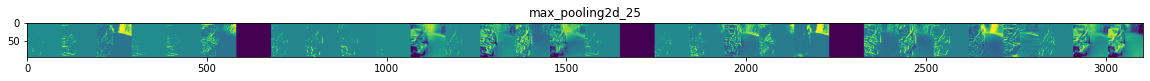

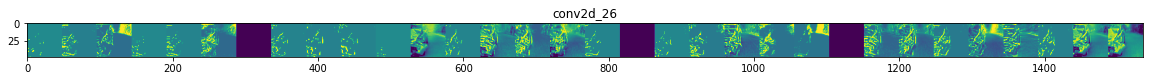

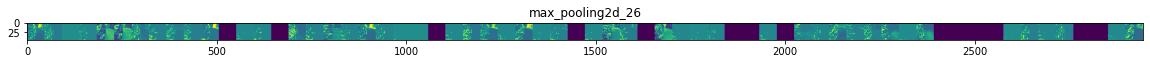

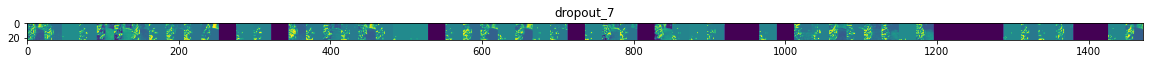

In [72]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# we define a new custom Keras model that receives an input image
# and returns the representations of the layers of the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=successive_outputs)


img = load_img('/content/carched.jpg', target_size=(200, 200))  # this is a raw image in PIL format
x   = img_to_array(img)                           # np array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # np array with shape  (1, 150, 150, 3)

# rescale pixel values 1/255
x /= 255.0

# by making calling the predict method we obtain
# the intermediate representations of this image from the previous model
successive_feature_maps = visualization_model.predict(x)

# let's map the layers of this model with their name
layer_names = [layer.name for layer in model_opt.layers]

# plot everything
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4: # if it is a conv or pooling layer
    n_features = feature_map.shape[-1]  # n features
    size       = feature_map.shape[ 1]  # shape
    
    # create a grid to display the data
    display_grid = np.zeros((size, size * n_features))
    
    # some post-processing
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x

    # show the chart
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

After changing the optimizer to ***RMSprop*** we got better matching and accuracy than ***adam***. So now lets add a conv2D layer and Maxpooling layer to extract more features and **improve accuracy**.

In [60]:
model_opt2 = tf.keras.models.Sequential([
    data_augumentation, # data augumentation
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),  # random layer droping 
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [61]:
model_opt2.compile(optimizer='RMSprop',loss='binary_crossentropy',metrics = ['accuracy'])

In [65]:
history_opt2 = model_opt2.fit(
            train_gen, # pass in the training generator
            steps_per_epoch=36,
            epochs=15,
            validation_data=test_gen, # pass in the validation generator
            validation_steps=9,
            verbose=2
            )

Epoch 1/15
36/36 - 94s - loss: 0.3311 - accuracy: 0.8581 - val_loss: 0.4228 - val_accuracy: 0.8400 - 94s/epoch - 3s/step
Epoch 2/15
36/36 - 97s - loss: 0.3224 - accuracy: 0.8648 - val_loss: 0.7141 - val_accuracy: 0.7711 - 97s/epoch - 3s/step
Epoch 3/15
36/36 - 93s - loss: 0.3229 - accuracy: 0.8648 - val_loss: 0.4778 - val_accuracy: 0.7978 - 93s/epoch - 3s/step
Epoch 4/15
36/36 - 93s - loss: 0.3121 - accuracy: 0.8726 - val_loss: 0.4684 - val_accuracy: 0.8311 - 93s/epoch - 3s/step
Epoch 5/15
36/36 - 98s - loss: 0.2995 - accuracy: 0.8644 - val_loss: 0.8306 - val_accuracy: 0.7400 - 98s/epoch - 3s/step
Epoch 6/15
36/36 - 93s - loss: 0.2829 - accuracy: 0.8760 - val_loss: 0.5242 - val_accuracy: 0.8133 - 93s/epoch - 3s/step
Epoch 7/15
36/36 - 93s - loss: 0.3107 - accuracy: 0.8721 - val_loss: 0.4015 - val_accuracy: 0.8533 - 93s/epoch - 3s/step
Epoch 8/15
36/36 - 92s - loss: 0.2885 - accuracy: 0.8832 - val_loss: 0.4339 - val_accuracy: 0.8222 - 92s/epoch - 3s/step
Epoch 9/15
36/36 - 92s - loss: 0

Text(0.5, 1.0, 'Loss in training and testing')

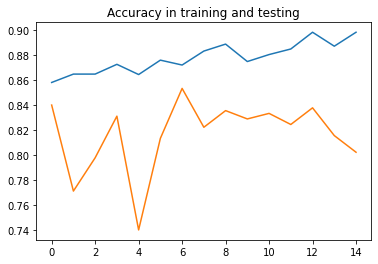

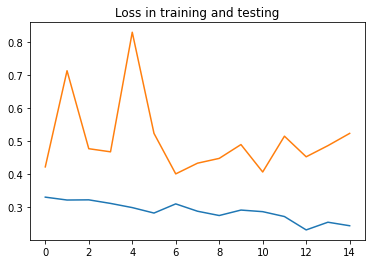

In [67]:
# get the metrics from history

acc = history_opt2.history['accuracy']
val_acc = history_opt2.history['val_accuracy']
loss = history_opt2.history['loss']
val_loss = history_opt2.history['val_loss']

epochs = range(len(acc)) 

# plot accuracy 
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Accuracy in training and testing')
plt.figure()

# plot loss 
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss in training and testing')

1/1 [==============================] - 0s 106ms/step


<ipython-input-73-5628c6462431>:39: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()


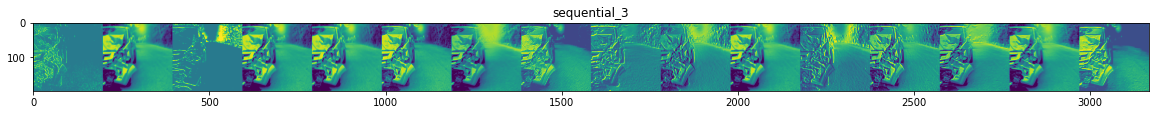

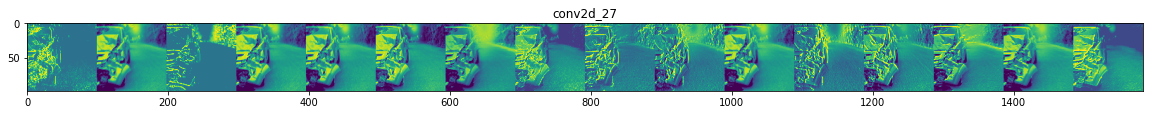

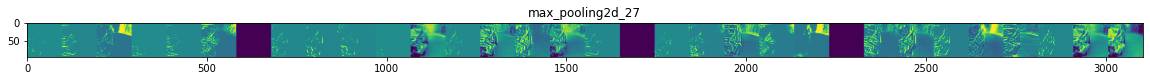

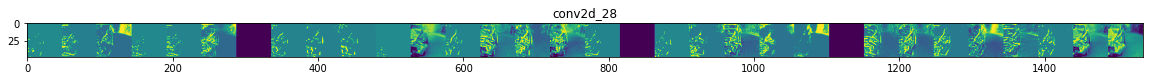

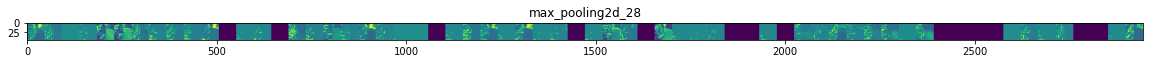

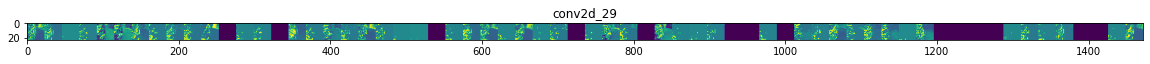

In [73]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# we define a new custom Keras model that receives an input image
# and returns the representations of the layers of the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=successive_outputs)


img = load_img('/content/carched.jpg', target_size=(200, 200))  # this is a raw image in PIL format
x   = img_to_array(img)                           # np array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # np array with shape  (1, 150, 150, 3)

# rescale pixel values 1/255
x /= 255.0

# by making calling the predict method we obtain
# the intermediate representations of this image from the previous model
successive_feature_maps = visualization_model.predict(x)

# let's map the layers of this model with their name
layer_names = [layer.name for layer in model_opt2.layers]

# plot everything
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4: # if it is a conv or pooling layer
    n_features = feature_map.shape[-1]  # n features
    size       = feature_map.shape[ 1]  # shape
    
    # create a grid to display the data
    display_grid = np.zeros((size, size * n_features))
    
    # some post-processing
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x

    # show the chart
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

# Final Result 

train_accuracy = 89.83 % ==> 90 %

validation_accuracy = 80.22 % ==> 80 %

loss = 0.2445

validation_loss = 0.5242

which is a better improvement from (100 , 80, 0.1326 , 0.7844 ) to ( 90 ,80, 0.2445 , 0.5242)

## MODEL TESTING IN COLAB

In [53]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
 
  path = '/content/' + fn 
  img = tf.keras.utils.load_img(path, target_size=(200, 200)) 
  
  
  x = tf.keras.utils.img_to_array(img)
  x /= 255 
  x = np.expand_dims(x, axis=0)
  
  images = np.vstack([x])
  
 
  classes = model_dasimp.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0] > 0.5:
    print(fn + " not damaged!")
  else:
    print(fn + " damaged!")

Saving carched.jpg to carched (1).jpg
1/1 [==============================] - 0s 119ms/step
[0.04574178]
carched.jpg damaged!


# Complete Model Downloading

use this code to download models,weights & architecture

models names & type :

- model : normal model

- model_es : early stopping model

- model_da : data augumentation model

- model_simp : 2 pair layer instead of 3 pair layer , pair = {conv2D,Maxpooling}

- model_dasimp : simp model with data augumentation

- model_opt : change of optimization function to RMSprop in dasimp model

- model_opt2 : RMSprop , Dataaugumented and added layer pair (3 pair layer)

We can download complete ***model*** , it helps in ***automatic setup** instead of ***manuall setup** for just ***weights***

I will provide model_opt2 as it's most optimum model in the list

In [74]:
from tensorflow.keras.models import load_model

# save whole model

model.save('/content/drive/MyDrive/trained_model1/model_final.hdf5')

# ------------> TO DOWNLOAD AND SETUP MODEL
# uncomment the following

#new_model = keras.models.load_model(model_path)

We can also download only ***weights*** , but to setup the model we need to know ***architecture*** of the model which can also be downloaded

To get WEIGHTS and ARCHITECTURE , uncomment the following code as mentioned

In [75]:
# weight saving

model_opt2.save_weights("/content/drive/MyDrive/trained_model1/weights_final.hdf5")

# ------------> TO DOWNLOAD AND SETUP WEIGHTS
# uncomment the following
#new_model = keras.models.load_model(weight_path)
# to use this we need proper architecture

# architecture saving 

json_string = model_opt2.to_json()

with open('/content/drive/MyDrive/trained_model1/archi_final.json','w') as f:
  f.write(json_string)

# to open json
# ------------> TO DOWNLOAD AND SETUP ARCHITECTURE
# uncomment the following

# with open(archi_path,'r') as g:
#   loaded_json = g.read()
# new_model = keras.models.model_from_json(loaded_json)